# Homework 3

## Pair Programming Group Number: 17
## Members of Team: Jazmin Reyna

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
url = 'https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/'
df = pd.read_csv(url)

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
# create a copy of df
df1 = df.copy()

# drop any rows that have missing values
df1 = df1.dropna(axis = 0, how = 'any')

# reset the index to
df1 = df1.reset_index(drop = True)

## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula

def haversine_distance(pt1,pt2):
    # make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    pt1_r = pt1 * np.pi / 180
    pt2_r = pt2 * np.pi / 180
    
    # set radius
    radius = 6371.0088
    
    # establish variables
    sin_arg1 = ((pt2_r[0] - pt1_r[0])/2)
    sin_arg2 = ((pt2_r[1] - pt1_r[1])/2)
    
    arc_sin_arg = np.sqrt((np.sin(sin_arg1)*np.sin(sin_arg1)) + np.cos(pt2_r[0])*np.cos(pt2_r[0])*(np.sin(sin_arg2)*np.sin(sin_arg2)))
    
    return np.arcsin(arc_sin_arg)*2*radius

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
ot = np.array([-37.68178,144.73779])
haversine_distance(toorak_pt, ot)

30.26618033336475

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df2 = df1.copy()
df2['distance_to_toorak'] = haversine_distance(toorak_pt, np.array([df2['Lattitude'], df2['Longtitude']]))

## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
# make copy
df3 = df2.copy()
dummy = pd.get_dummies(df3['Type'], prefix='Type')
removed = df3.drop(columns=['Type'])
X = pd.concat([dummy, removed], axis=1)
df3 = X

## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr('pearson')

,Type_h,Type_t,Type_u,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Type_h,1.000000,-0.484749,-0.778062,0.501128,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221107
Type_t,-0.484749,1.000000,-0.172282,-0.040762,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014197
Type_u,-0.778062,-0.172282,1.000000,-0.535102,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238817
Rooms,0.501128,-0.040762,-0.535102,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232836
Price,0.391761,-0.095295,-0.372766,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357018
Postcode,-0.040504,-0.008546,0.051754,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.007893
Bedroom2,0.484612,-0.037366,-0.518941,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241507
Bathroom,0.181773,0.108148,-0.282390,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051652
Car,0.214175,-0.006836,-0.236298,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214738
Landsize,0.047422,-0.067257,-0.005103,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041428


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
df3 = df3.select_dtypes(np.number)
X = df3.drop(columns='Price')
X = pd.concat([pd.DataFrame({'intercept': np.ones(len(df3))}), X], axis=1)

In [9]:
# Step two, build the column vector y
y = df3['Price']

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond=None)

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat)

668189.5555880725

In [12]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
url2 = 'https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv'
df_f = pd.read_csv(url)
df_f = df_f.fillna(method = 'bfill')

In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
df_f['distance_to_toorak'] = haversine_distance(toorak_pt, np.array([df_f['Lattitude'], df_f['Longtitude']]))
dummy = pd.get_dummies(df_f['Type'], prefix='Type')
removed = df_f.drop(columns=['Type'])
X1 = pd.concat([dummy, removed], axis=1)
df_f = X1

In [15]:
# Step two, build the attribute matrix Xdot
df_f = df_f.select_dtypes(np.number)
Xdot = df_f.drop(columns='Price')
Xdot = pd.concat([pd.DataFrame({'intercept': np.ones(len(df_f))}), Xdot], axis=1)

In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
df_f['Predicted'] = np.matmul(Xdot, beta_hat)

In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
abser = np.abs(df_f['Price']-df_f['Predicted'])

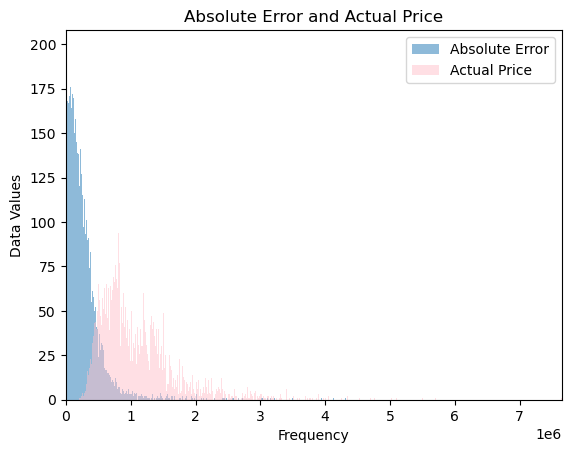

In [23]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
plt.hist(abser, bins = 1000, alpha = 0.5, label = 'Absolute Error')
plt.hist(df_f['Price'], bins = 1000, alpha = 0.5, color = 'pink', label = 'Actual Price')
plt.xlim(0, max(y))
plt.xlabel('Frequency')
plt.ylabel('Data Values')
plt.title('Absolute Error and Actual Price')
plt.legend()